In [139]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')

<ipython-input-139-f8476dfdbffa>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [163]:
df = pd.read_csv("data_SBI_NSE_last3monts2.csv",delimiter=',',header=None,skiprows=1,names=['Date','Symbol','Series','Open','High','Low','AdjClose','Close','Quantity','TurnoverInLacks'])
df.head(5)

,Date,Symbol,Series,Open,High,Low,AdjClose,Close,Quantity,TurnoverInLacks
0,01-Jan-21,SBIN,EQ,274.90,280.00,274.4,279.05,279.40,24531791,68279.68
1,31-Dec-20,SBIN,EQ,275.00,277.25,272.6,274.40,274.95,29467966,81121.61
2,30-Dec-20,SBIN,EQ,278.00,278.70,272.5,275.50,276.90,30971894,85316.81
3,29-Dec-20,SBIN,EQ,276.30,279.90,274.7,277.75,277.90,45032526,124992.51
4,28-Dec-20,SBIN,EQ,268.75,276.00,268.0,275.75,275.20,36870242,100373.67


In [141]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Open', 'High', 'Low', 'AdjClose', 'Close',
       'Quantity', 'TurnoverInLacks'],
      dtype='object')

In [142]:
df.describe()

,Open,High,Low,AdjClose,Close,Quantity,TurnoverInLacks
count,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000
mean,232.174603,236.036508,228.717460,232.892063,232.953175,5.450876e+07,126092.857937
std,31.120983,31.331652,31.034378,31.390781,31.460547,2.618452e+07,61287.332060
min,189.350000,190.700000,185.900000,189.300000,188.700000,7.753219e+06,17908.150000
25%,200.350000,204.475000,196.650000,200.775000,201.425000,3.590992e+07,79693.585000
50%,233.200000,241.600000,231.000000,238.600000,238.700000,4.849564e+07,111259.170000
75%,264.400000,268.925000,259.300000,265.450000,265.175000,6.737169e+07,149944.700000
max,278.000000,280.000000,274.700000,279.050000,279.400000,1.380236e+08,310228.160000


In [143]:
x = df[['Open','High','Low']].values
y = df[['Close']].values

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [145]:
print("x_train has",x_train.shape,"Shape")
print("y_train has",y_train.shape,"Shape")
print("x_test has",x_test.shape,"Shape")
print("y_test has",y_test.shape,"Shape")

x_train has (47, 4) Shape
y_train has (47, 1) Shape
x_test has (16, 4) Shape
y_test has (16, 1) Shape


In [146]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()

In [147]:
LinearRegression = LinearRegression.fit(x_train,y_train)

In [148]:
print(LinearRegression.coef_)
print(LinearRegression.intercept_)

[[-6.17568697e-01  9.20168303e-01  7.03094200e-01  2.25427355e-09]]
[-1.85383859]


In [149]:
PredictionOfTest = LinearRegression.predict(x_test)

In [150]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':PredictionOfTest.flatten()})
dframe.head(6)

,Actual,Predicted
0,271.90,269.309644
1,243.00,246.550088
2,270.65,269.686947
3,200.05,198.992514
4,203.05,203.250884
5,219.50,218.355262


In [151]:
from sklearn import metrics
MAE = print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,PredictionOfTest))
MSE = print('Mean Squred Error:', metrics.mean_squared_error(y_test,PredictionOfTest))
RMSE= print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(y_test,PredictionOfTest)))
accuracy = LinearRegression.score(x_test,PredictionOfTest) 
print('accuracy score: ',accuracy*100,'%')

Mean Absolute Error: 1.5095247049145737
Mean Squred Error: 4.449411402868223
Root Mean Squred Error: 2.1093627954593828
accuracy score:  100.0 %


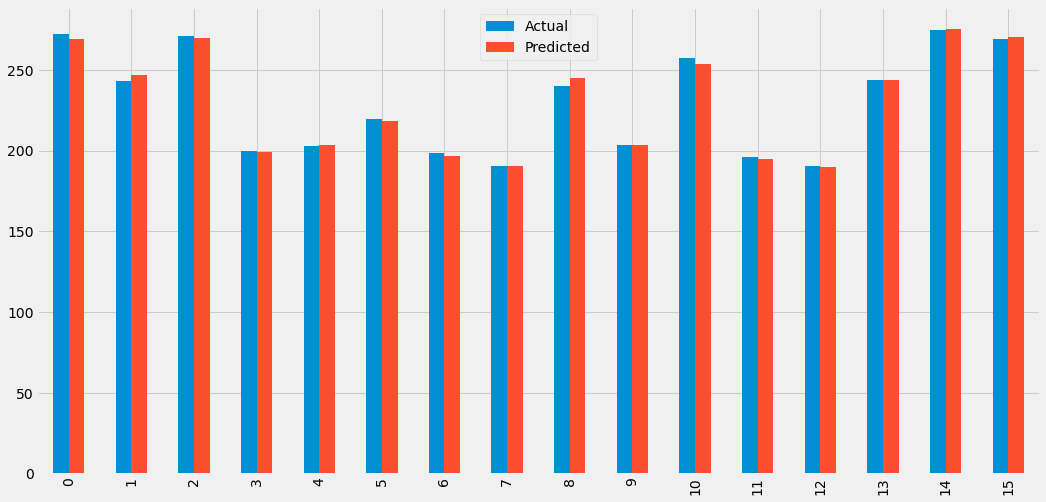

In [153]:
import math
graph = dframe.head(20)
graph.plot(kind='bar',figsize=(16,8))

In [154]:
PredictionOfAll = LinearRegression.predict(x)

In [155]:
dframe2 = pd.DataFrame({'Actual':y.flatten(),'Predicted':PredictionOfAll.flatten()})
dframe2.head(20)

,Actual,Predicted
0,279.40,279.008001
1,274.95,275.161340
2,276.90,274.575958
3,277.90,278.308531
4,275.20,274.653387
5,266.85,268.016025
6,263.00,262.070679
7,257.45,253.495728
8,254.70,256.521265
9,271.45,269.449968


In [156]:
from sklearn import metrics
MAE = print('Mean Absolute Error:', metrics.mean_absolute_error(y,PredictionOfAll))
MSE = print('Mean Squred Error:', metrics.mean_squared_error(y,PredictionOfAll))
RMSE= print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(y,PredictionOfAll)))

Mean Absolute Error: 1.4629552385174764
Mean Squred Error: 3.4446095121836016
Root Mean Squred Error: 1.8559659243056166


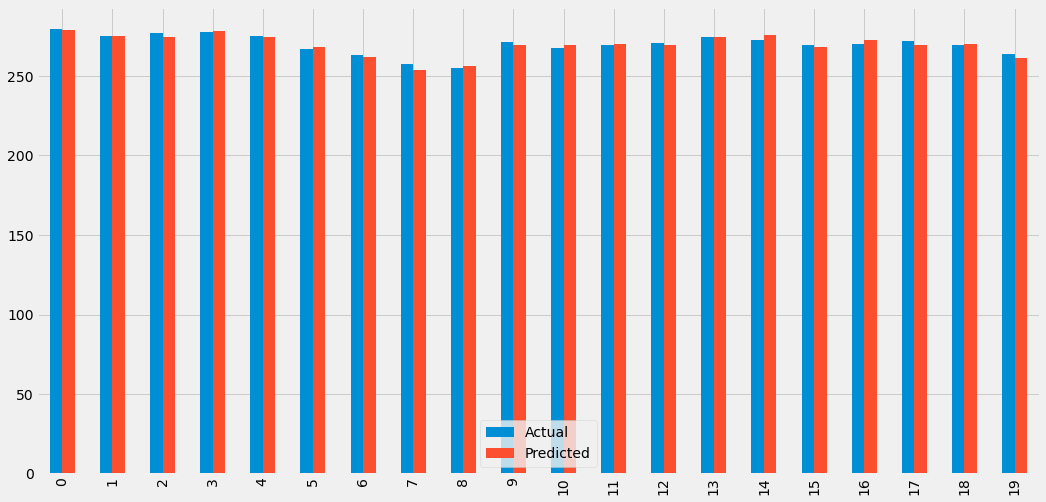

In [157]:
import math
graph = dframe2.head(20)
graph.plot(kind='bar',figsize=(16,8))

In [167]:
index=[0]
dframe3 = pd.DataFrame({'Index':index,'Open':281.85,'High':283.90,'Low':277.75,'Quantity':23531791})
dframe3

,Index,Open,High,Low,Quantity
0,0,281.85,283.9,277.75,23531791


In [168]:
x_fore = dframe3[['Open','High','Low','Quantity']].values



In [169]:
LinearRegression.predict(x_fore)

array([[280.65766657]])

In [ ]:
data = df.filter(['Close'])
Dates = df.filter(['Date'])
Adj_close = df.filter(['Adj Close'])
valid = data[60:]
valid['Predictions'] = predictions
valid['Date'] = Dates
valid['Adj Close'] = Adj_close

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data)
plt.plot(valid[['Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()